In [122]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [123]:
query = """
SELECT * FROM restaurant_orderitem
JOIN restaurant_product ON restaurant_product.id = restaurant_orderitem.product_id
JOIN restaurant_order ON restaurant_order.id = restaurant_orderitem.order_id
"""
connection = sqlite3.connect("../db.sqlite3")

data = pd.read_sql(query, connection)
data = data[["quantity", "price", "name", "datetime"]]
data.to_csv("../restaurant_orders.csv")
    

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

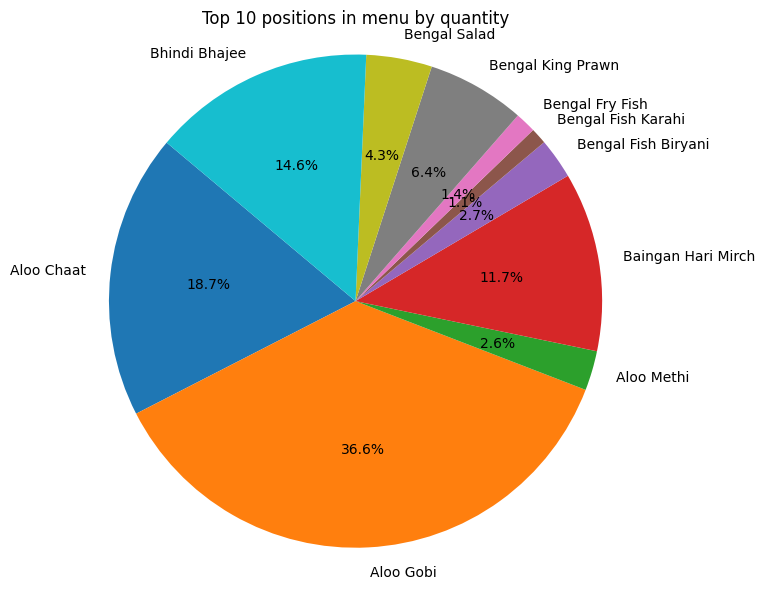

In [124]:
top_10_products = data.groupby("name").agg({"quantity": "sum"}).head(10)["quantity"]
plt.figure(figsize=(7, 7))
plt.pie(top_10_products.values, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

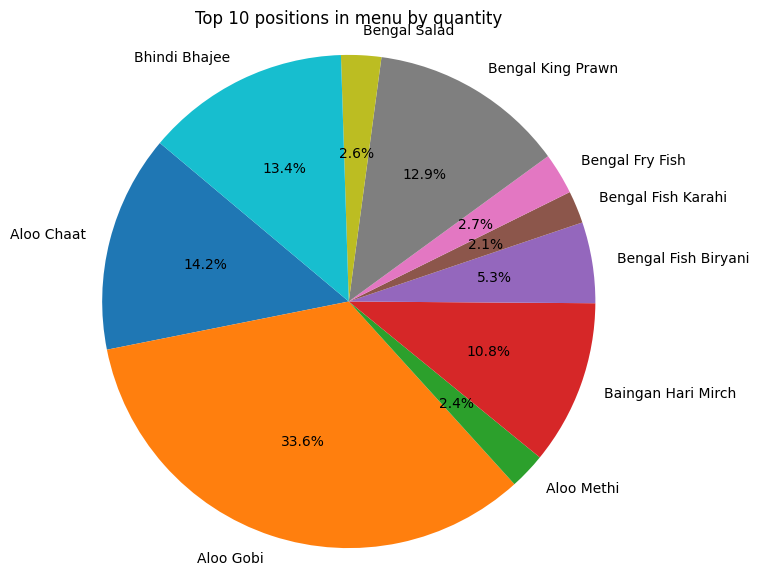

In [125]:
data["Item Price"] = data["price"] * data["quantity"]
grouped_data = data.groupby("name").agg({"Item Price": "sum"}).head(10)["Item Price"]
plt.figure(figsize=(7, 7))
plt.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Top 10 positions in menu by quantity")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

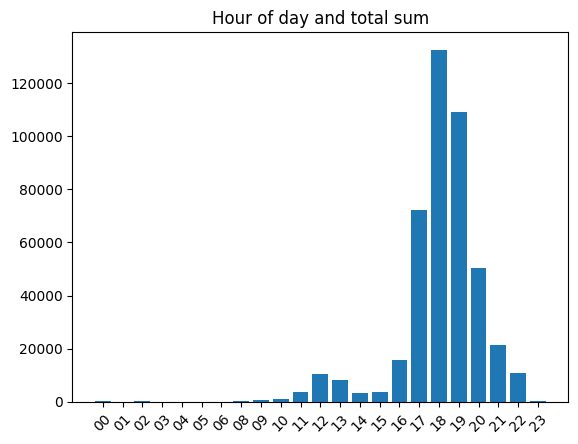

In [126]:
data["Order Hour"] = data["datetime"].str.extract(r'\b\d{4}-\d{2}-\d{2} (\d{2}):.*$')
hour_price_group = data.groupby("Order Hour").agg({"Item Price": "sum"})
plt.bar(hour_price_group.index, hour_price_group["Item Price"])
plt.title("Hour of day and total sum")
plt.xticks(rotation=45)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

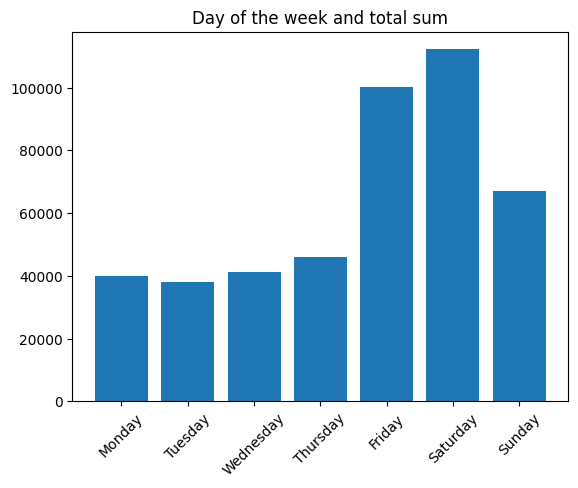

In [127]:
data["Order Day"] = pd.to_datetime(data["datetime"]).apply(lambda date: date.strftime("%A"))

day_price_group = data.groupby("Order Day").agg({"Item Price": "sum"})

custom_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_price_group = day_price_group.reindex(custom_order)

plt.bar(day_price_group.index, day_price_group["Item Price"])
plt.title("Day of the week and total sum")
plt.xticks(rotation=45)
plt.show()